In [2]:
# python 3 plot legend tests

# import packages for data manipulation
from sqlalchemy import create_engine
import pandas as pd
import geopandas as gpd

# packages for visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# for interactivity
# from ipywidgets import *
%matplotlib notebook

# set Seaborn context/style
sns.set_context(context='notebook')
sns.set_style('darkgrid')

# database connection
DB = 'datadb'
USER = 'postgres'
HOST = 'localhost'
PORT = '5432'
PW = 'postgres'

DB_CONNECTION_STRING = 'postgresql://{username}:{password}@{host}:{port}/{database}'.format(
username=USER, password=PW, host=HOST, port=PORT, database=DB)

engine = create_engine(DB_CONNECTION_STRING)

In [3]:
# get counties for map

qry = """
SELECT geoid, name,
    ST_Transform(geom, 102698) geom 
FROM tl_2016_us_county 
WHERE cbsafp = '{CBSA}' AND statefp = '29'
""".format(CBSA='28140')

counties = gpd.read_postgis(qry, engine, geom_col='geom')
counties['coords'] = counties.geometry.apply(lambda x: x.representative_point().coords[0])

In [4]:
counties['rand_float'] = counties.apply(lambda x: pd.np.random.random(), axis=1)

In [9]:
# create number of tick marks in legend and set location to display them
numpoints = 5
leg_ticks = pd.np.linspace(-1,1,numpoints)

# create labels based on number of tickmarks
leg_min = counties['rand_float'].min()
leg_max = counties['rand_float'].max()
leg_tick_labels = [str(round(x*100,1))+'%' for x in pd.np.linspace(leg_min,leg_max,numpoints)]

# create dictionary to pass to GeoDataFrame.plot()
leg_kwds_dict = {'numpoints': numpoints, 'labels': leg_tick_labels}

<IPython.core.display.Javascript object>


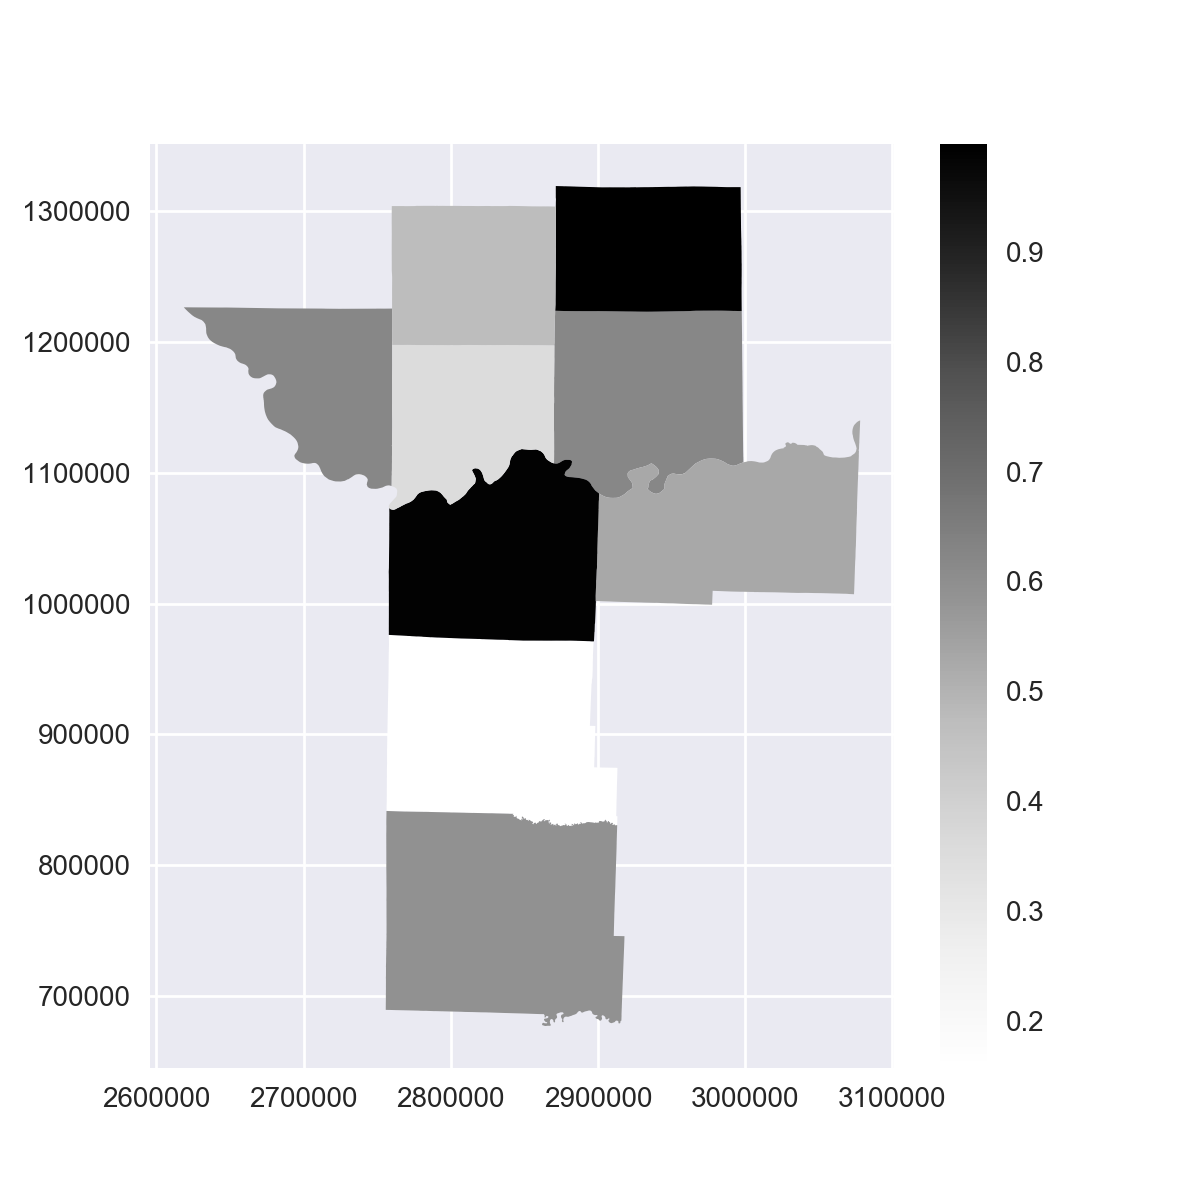

In [11]:
f, ax = plt.subplots(1, figsize=(6,6))
# ax = 
counties.plot('rand_float', legend=True, ax=ax)#, legend_kwds=leg_kwds_dict) # how do you pass 'legend_kwds'?
# ax.legend()
# handles, labels = ax.get_legend_handles_labels() # does not seem to return either handles or labels

# leg = ax.get_legend() # type(leg) is NoneType


In [12]:
type(leg)

NoneType

In [7]:
len(handles), len(labels)

(0, 0)